*** 1. Define an approach you would take to solve the problem and document it

By following this approach bellow, you can systematically tackle the problem of predicting bike rentals and build a reliable model for estimating bike rental demand.

- Data Understanding and Exploration

- Data Preprocessing

- Feature Engineering

- Model Selection and Training

- Model Evaluation and Validation

- Model Interpretation and Deployment

- Documentation and Reporting

*** 2. Get the data and determine what type of machine learning problem it is

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
 rbs= pd.read_csv('bike-sharing-day.csv')

In [5]:
rbs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


*** Now, let's determine the type of machine learning problem:

    Since we are trying to predict a continuous variable (cnt), the problem falls under the category of REGRESSION.

    Specifically, this is a regression problem aimed at predicting the total count of bike rentals per day based on various features such as time, weather conditions, and environmental factors.
    
    In summary, the machine learning problem based on the provided dataset is a regression problem. We aim to build a regression model that can accurately predict the total number of bike rentals per day.

In [4]:
rbs.shape

(731, 16)

In [5]:
rbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
columns = [i for i in rbs.columns]

In [7]:
columns

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

    To create a data dictionary for the bike-sharing dataset, we'll provide descriptions for each column to explain its meaning and data type. Here's the data dictionary:

*** instant: Description: A unique identifier for each record.
         Data Type: Integer
         
*** dteday:  Description: The date in YYYY-MM-DD format.
             Data Type: String (Date)
         
*** season:  Description: The season of the year.

             Values 1: Spring 2: Summer 3: Fall 4: Winter
             Data Type: Integer
         
*** yr:  Description: The year (0: 2011, 1: 2012).
         Data Type: Integer
         
     *** mnth:    Description: The month of the year.

         Values: 1 to 12 (representing January to December)
         Data Type: Integer
         
       *** holiday:     Description: Indicator if the day is a holiday or not.

             Values: 0: Not a holiday  1: Holiday
             Data Type: Integer
             
        *** weekday:    Description: The day of the week.

             Values: 0 to 6 (representing Sunday to Saturday)
             Data Type: Integer
             
             
    *** workingday:   Description: Indicator if the day is a working day or not.

              Values:   0: Not a working day     1: Working day
               Data Type: Integer
               
      *** weathersit:     Description: Weather situation.

              Values:
                1: Clear, Few clouds, Partly cloudy, Partly cloudy
                2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              Data Type: Integer
              
     *** temp: Description: Normalized temperature in Celsius.
              Data Type: Float
              
      *** atemp:  Description: Normalized feeling temperature in Celsius.
   
               Data Type: Float
                      
       *** hum:  Description: Normalized humidity.
                  Data Type: Float
                  
     *** windspeed: Description: Normalized wind speed.
                    Data Type: Float
                    
        *** casual:   Description: Number of casual (non-registered) bike users.
                  Data Type: Integer
                  
        *** registered:   Description: Number of registered bike users.
                      Data Type: Integer
                      
             *** cnt:     Description: Total count of bike rentals (casual + registered).
                       Data Type: Integer

In [8]:
rbs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
cat = rbs.select_dtypes(include=['category', 'object'])
cat_columns = [i for i in cat.columns]

In [10]:
cat_columns

['dteday']

In [11]:
for i in cat_columns:
    print('-------------------------------')
    print('-------------------------------')
    print(rbs[i].value_counts())

-------------------------------
-------------------------------
dteday
2011-01-01    1
2012-04-25    1
2012-04-27    1
2012-04-28    1
2012-04-29    1
             ..
2011-09-03    1
2011-09-04    1
2011-09-05    1
2011-09-06    1
2012-12-31    1
Name: count, Length: 731, dtype: int64


In [15]:
# Convert 'dteday' column to string
rbs['dteday'] = rbs['dteday'].astype(str)

In [16]:
print(rbs.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [17]:
rbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*** 3. Outline possible algorithms you would use to create the model. 

     To create a predictive model for bike rental demand based on the provided dataset, several algorithms can be considered:

-  Linear Regression

-  Decision Trees

-  Random Forests

- Gradient Boosting

- XGBoost

- Support Vector Regression (SVR)

- Neural Networks

- K-Nearest Neighbors (KNN)

*** 4. Conduct exploratory analysis to understand the distribution of variables, identify any correlations, and gain insights into the dataset.

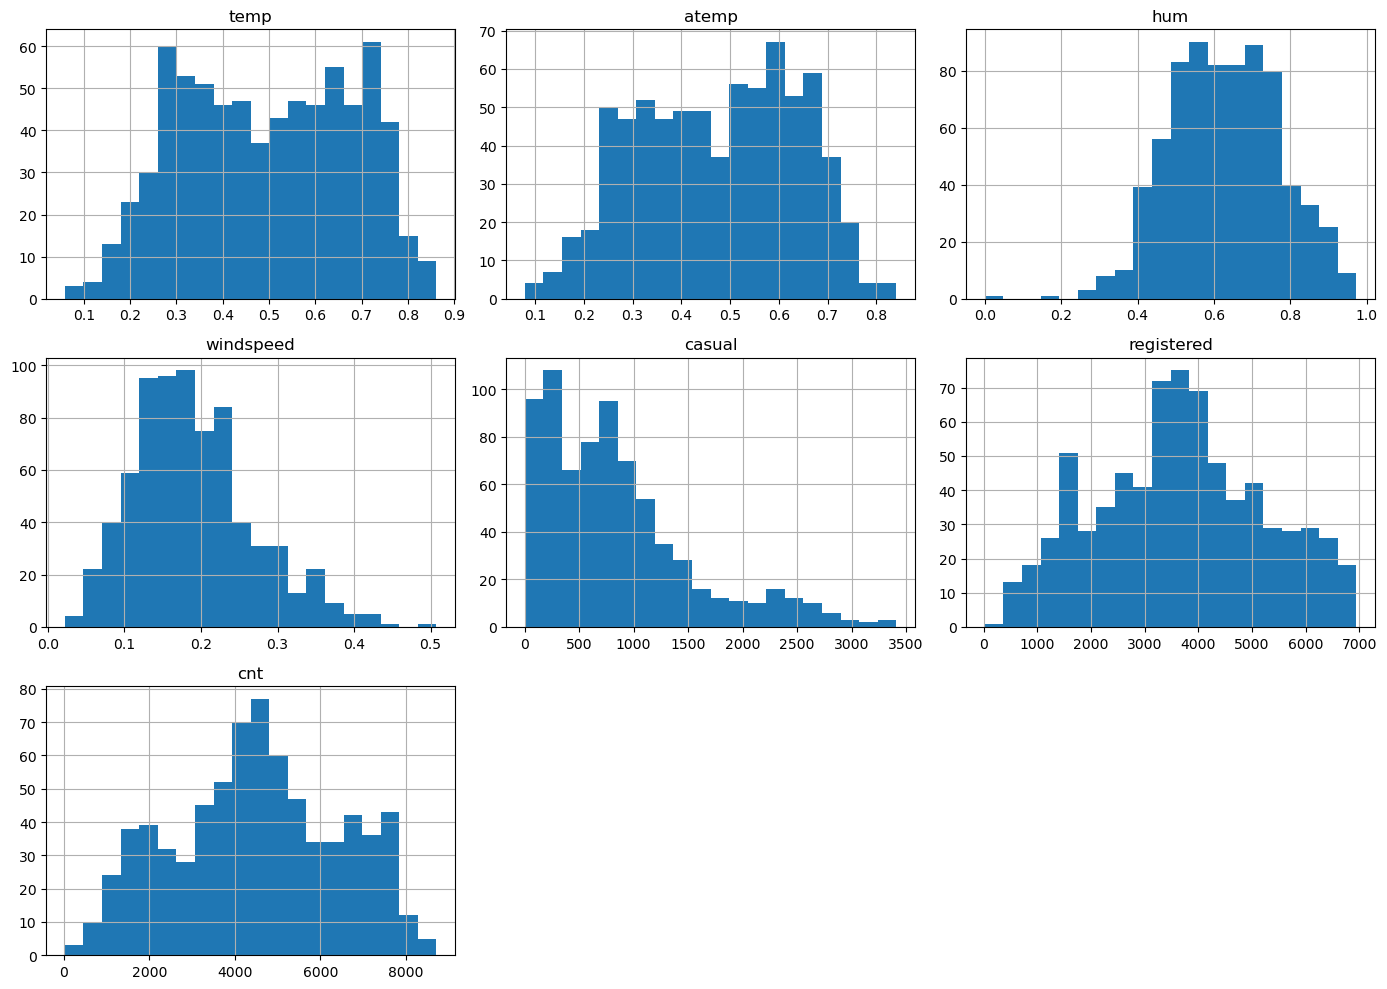

In [7]:
*** explore the distribution of numerical variables using histograms:
    
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']  
rbs[num_cols].hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

*** We can visualize the correlations between numerical variables using a heatmap

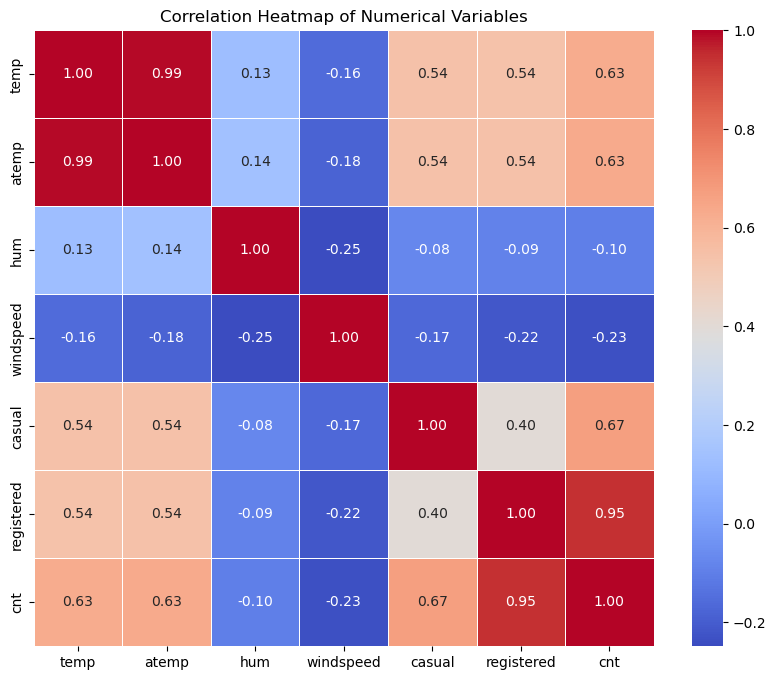

In [12]:
corr_matrix = rbs[num_cols].corr() #  Calculate correlation matrix

plt.figure(figsize=(10, 8))     # Plot heatmap of correlations
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

*** we can explore the relationships between numerical variables and categorical variables using box plots or violin plots

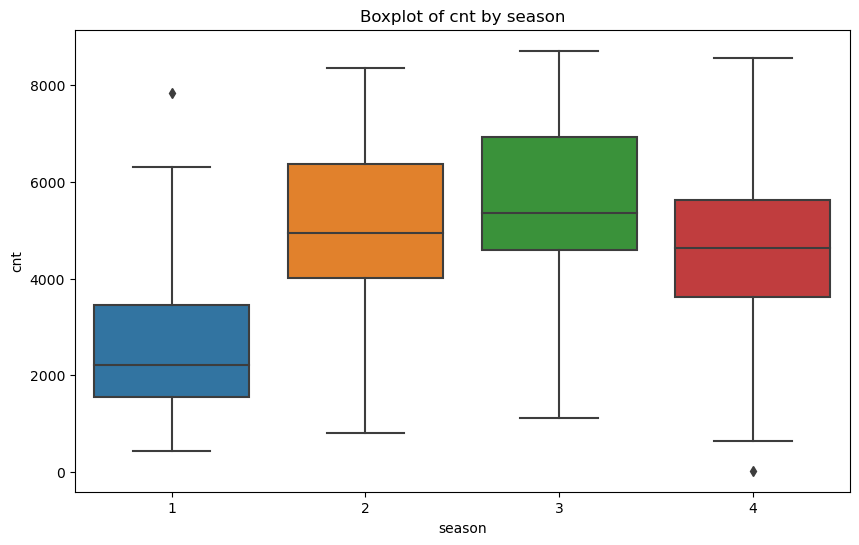

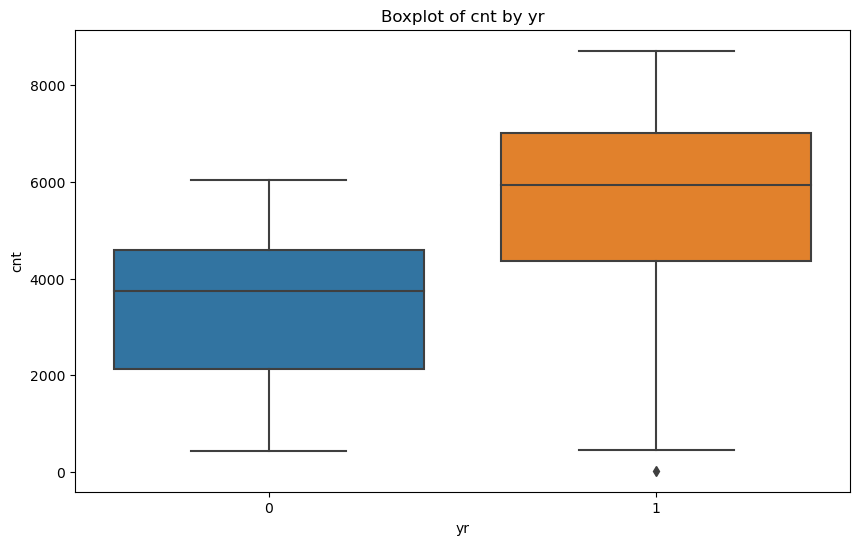

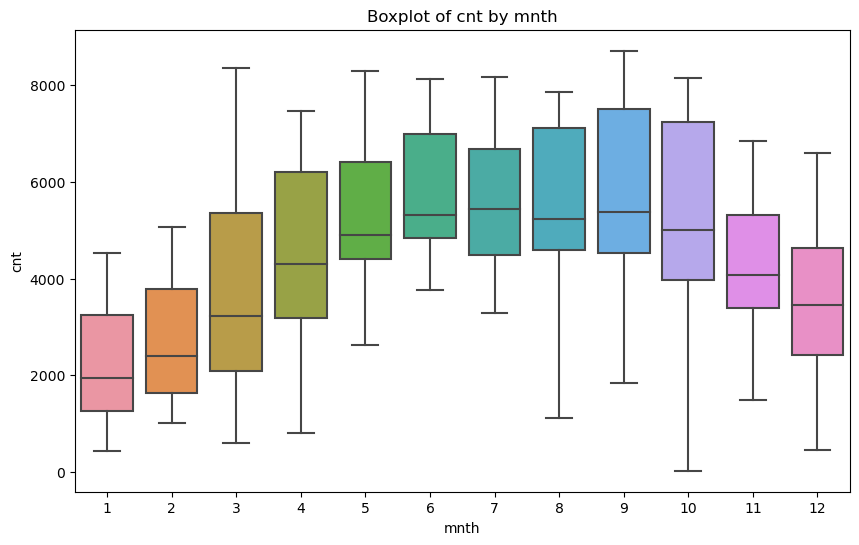

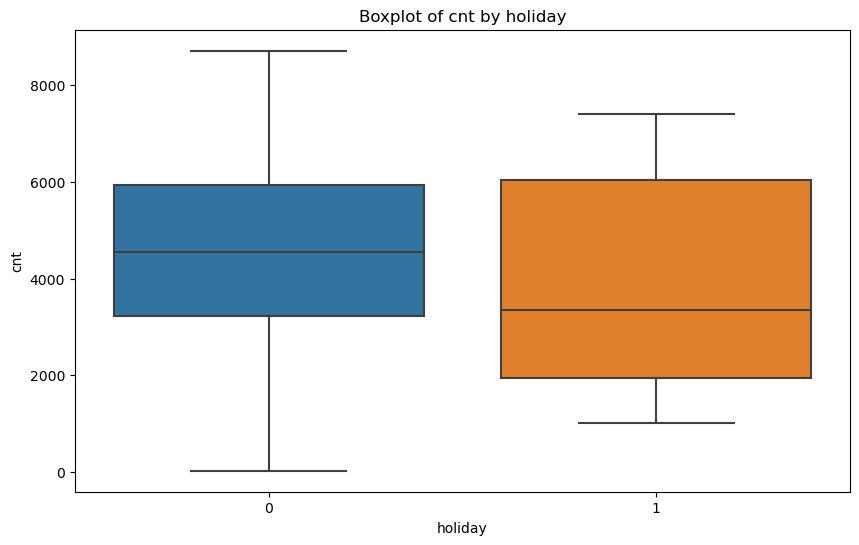

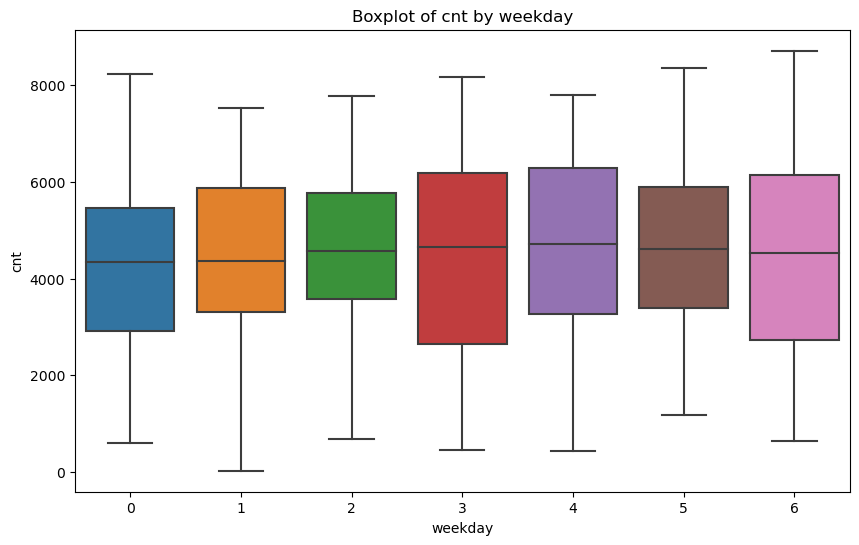

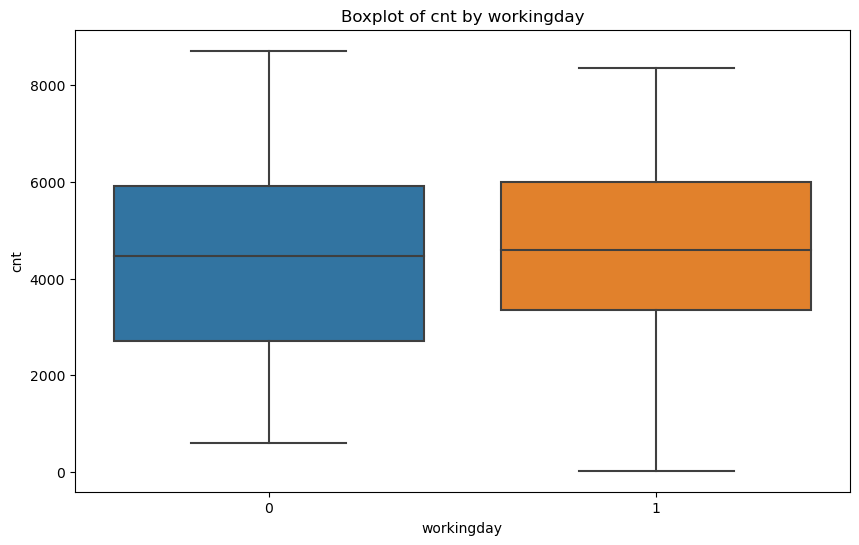

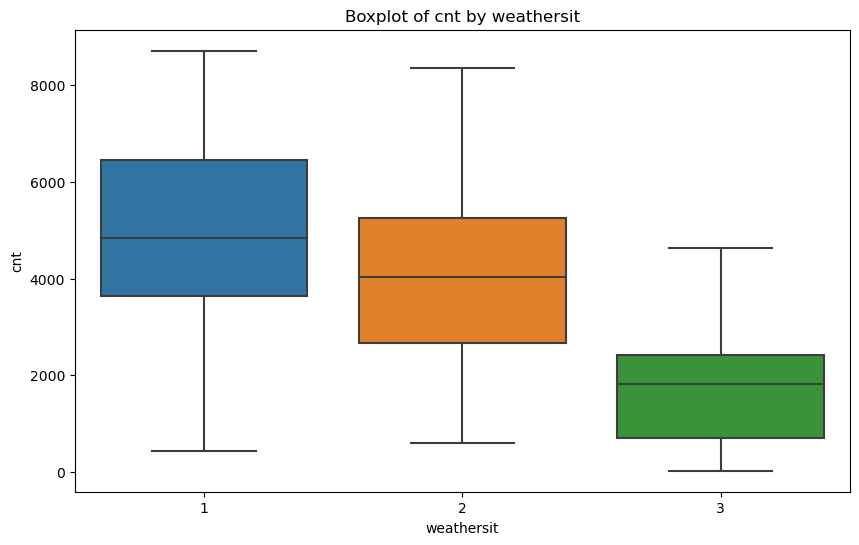

In [13]:
#Plot box plots or violin plots for numerical variables grouped by categorical variables
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sb.boxplot(x=col, y='cnt', data=rbs)
    plt.title(f'Boxplot of cnt by {col}')
    plt.show()

*** These visualizations will help us gain insights into the distribution of variables, identify any correlations between features, and understand how different factors may affect bike rental demand.

****** 5. Handle missing values, encode categorical variables, and scale numerical features if necessary. 

In [14]:
# Check for missing values
missing_values = rbs.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [15]:
# Encode categorical variables using one-hot encoding
rbs_encoded = pd.get_dummies(rbs, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], drop_first=True)

In [17]:
print(rbs.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical features
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
rbs_encoded[num_cols] = scaler.fit_transform(rbs_encoded[num_cols])

In [18]:
print(rbs.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


*** 6. Extract additional features if needed, such as interaction terms or polynomial features.

- To extract additional features from the dataset, such as interaction terms or polynomial features, we can use feature engineering techniques.

- Interaction Terms:  Interaction terms involve multiplying two or more features together to capture potential interactions between them.

- Polynomial Features:  Polynomial features involve creating higher-order terms of existing features, such as squared or cubed terms. This can help capture non-linear relationships between variables.

In [24]:
#Create interaction terms between temperature and humidity

rbs_encoded['temp_hum_interaction'] = rbs_encoded['temp'] * rbs_encoded['hum']

In [25]:
print(rbs.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Initialize PolynomialFeatures with degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Create polynomial features for selected numerical features
poly_features = poly_features.fit_transform(rbs_encoded[['temp', 'hum', 'windspeed']])

# Get the names of the polynomial features
poly_feature_names = poly_features.get_feature_names(['temp', 'hum', 'windspeed'])

# Convert polynomial features to DataFrame and concatenate with original data
poly_df = pd.DataFrame(poly_data, columns=poly_feature_names)
rbs_encoded = pd.concat([rbs_encoded.reset_index(drop=True), poly_df], axis=1)

NameError: name 'PolynomialFeatures' is not defined